### NAME: Shubham Kumar
### PRN: 18030142032
### Assignment : Rainfall Data Analysis

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./datafile.csv')

## Checking and Filtering Data

In [3]:
any(df.isnull().any()==True) # Checking for NaN 

False

#### Verifying ANNUAL Column data with all Months Column Data 

In [4]:
all(df.JAN+df.FEB+df.MAR+df.APR+df.MAY+df.JUN+df.JUL+df.AUG+df.SEP+df.OCT+df.NOV+df.DEC == df.ANNUAL)==True

False

In the given CSV, 'ANNUAL' column values are not correct. Hence no operations is going to be performed on ANNUAL column.
To perform operations on 'ANNUAL' column, we first need to correct ANNUAL data .

In [5]:
# Correcting ANNUAL Column data
df.ANNUAL = df.ANNUAL = df.JAN+df.FEB+df.MAR+df.APR+df.MAY+df.JUN+df.JUL+df.AUG+df.SEP+df.OCT+df.NOV+df.DEC
all(df.JAN+df.FEB+df.MAR+df.APR+df.MAY+df.JUN+df.JUL+df.AUG+df.SEP+df.OCT+df.NOV+df.DEC == df.ANNUAL)==True

True

In [6]:
gdf = df.groupby('STATE/UT') # GROUPING DATAFRAME by STATE/UT

## 1. Pie-chart which show rainfall for all 12 Months

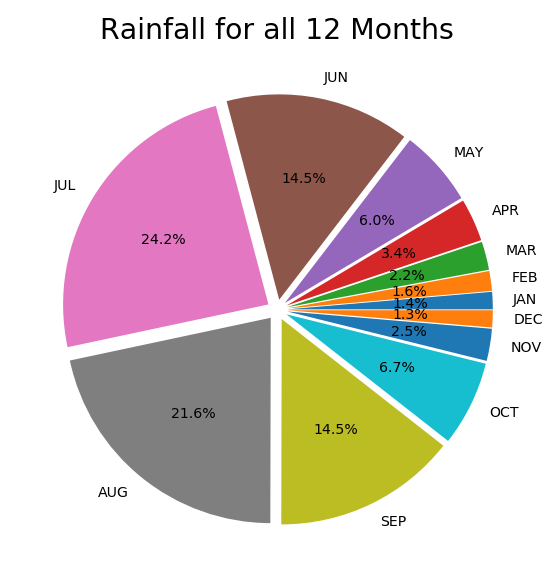

In [13]:
labels = ('JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC') # MONTHS; REUSED IN OTHER SNIPPET
sizes = list(df[list(labels)].sum()) # TOTAL RAINFALL PER MONTH
explode = [0.05 for x in range(len(sizes))] 
plt.figure(dpi=170)
plt.title('Rainfall for all 12 Months',fontsize = 12)
plt.pie(sizes, labels = labels,explode = explode,startangle = 360, autopct='%1.1f%%',textprops={'fontsize': 6,})
plt.show()

## 2. Bar graph for annual rainfall for each state

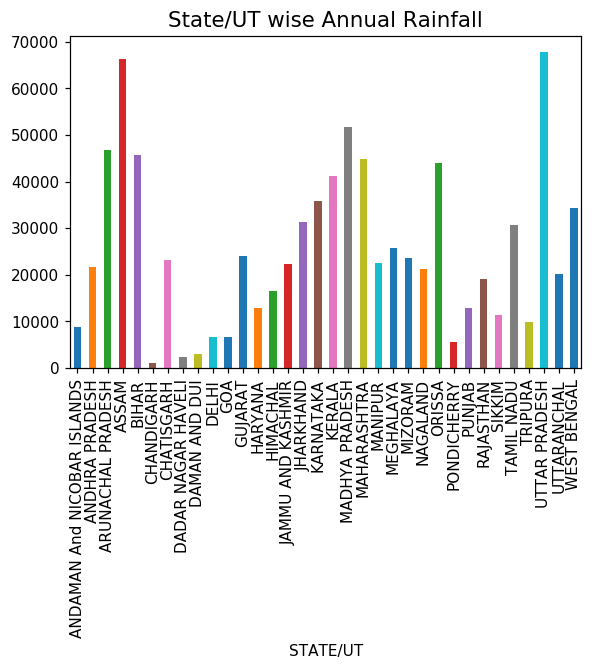

In [8]:
plt.figure(dpi=110)
plt.title('State/UT wise Annual Rainfall',fontsize = 14)
gdf['ANNUAL'].sum().plot(kind='bar') #GDF :- STATE/UT GROUPED ABOVE 
plt.show()

## 3. Line graph where months are on X-axis, rainfall for each month on Y-axis. Plot 5 states with lowest annual rainfall.


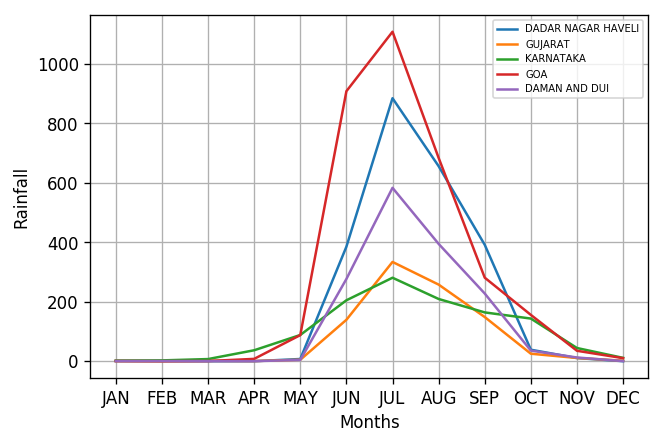

In [9]:
xdf = gdf[list(labels)].mean().nsmallest(5,list(labels)) # Listing 5 STATES/UT with lowest annual rainfall
plt.figure(dpi=120)
plt.xlabel('Months')
plt.ylabel('Rainfall')
plt.plot(xdf.T)# xdf.T: transposing the dataframe values
plt.legend(labels=tuple(xdf.index.values),loc="best",fontsize=6)
plt.grid()
plt.show()

## 4. Line graph where months are on X-axis and median of rainfall for each month on Y-axis.


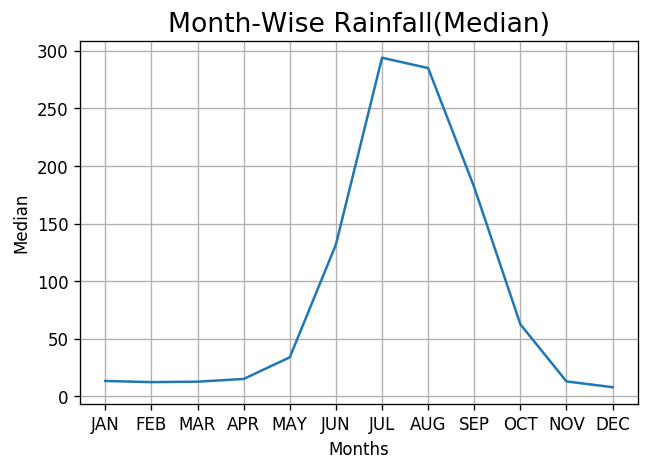

In [10]:
plt.figure(dpi=120)
plt.title('Month-Wise Rainfall(Median)',fontsize=16)
plt.xlabel('Months')
plt.ylabel('Median')
plt.plot(df[list(labels)].columns, df[list(labels)].median())
plt.grid()
plt.show()